# MMA 867 - Project

## Forecasting Number of Gifts for IC Company using TimeSeries Analysis

## By Team Alfred

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pmd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA as AR
import statsmodels.api as sm

In [3]:
df_sales_train = pd.read_csv("./competitive-data-science-predict-future-sales/sales_train.csv")

In [4]:
df_sample = pd.read_csv("./competitive-data-science-predict-future-sales/sample_submission.csv")

In [5]:
df_item_categories = pd.read_csv("./competitive-data-science-predict-future-sales/item_categories.csv")

In [6]:
df_items = pd.read_csv("./competitive-data-science-predict-future-sales/items.csv")

In [7]:
df_test = pd.read_csv("./competitive-data-science-predict-future-sales/test.csv")

In [8]:
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
df_sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [10]:
df_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [11]:
df_sales_train.shape

(2935849, 6)

In [12]:
df_sales_train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [13]:
df_sales_train['date'] = pd.to_datetime(df_sales_train['date'])

In [14]:
df_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [15]:
df_sales_train_daily = pd.DataFrame(df_sales_train.groupby('date')['item_cnt_day'].sum())

In [16]:
df_sales_train_daily.head()

,item_cnt_day
date,
2013-01-01,1951.0
2013-01-02,3817.0
2013-01-03,3846.0
2013-01-04,2574.0
2013-01-05,4863.0


In [17]:
df_sales_train_monthly = pd.DataFrame(df_sales_train.groupby('date_block_num')['item_cnt_day'].sum())
df_sales_train_monthly.head()

,item_cnt_day
date_block_num,
0,131479.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0


Text(0, 0.5, 'Items Sold Daily')

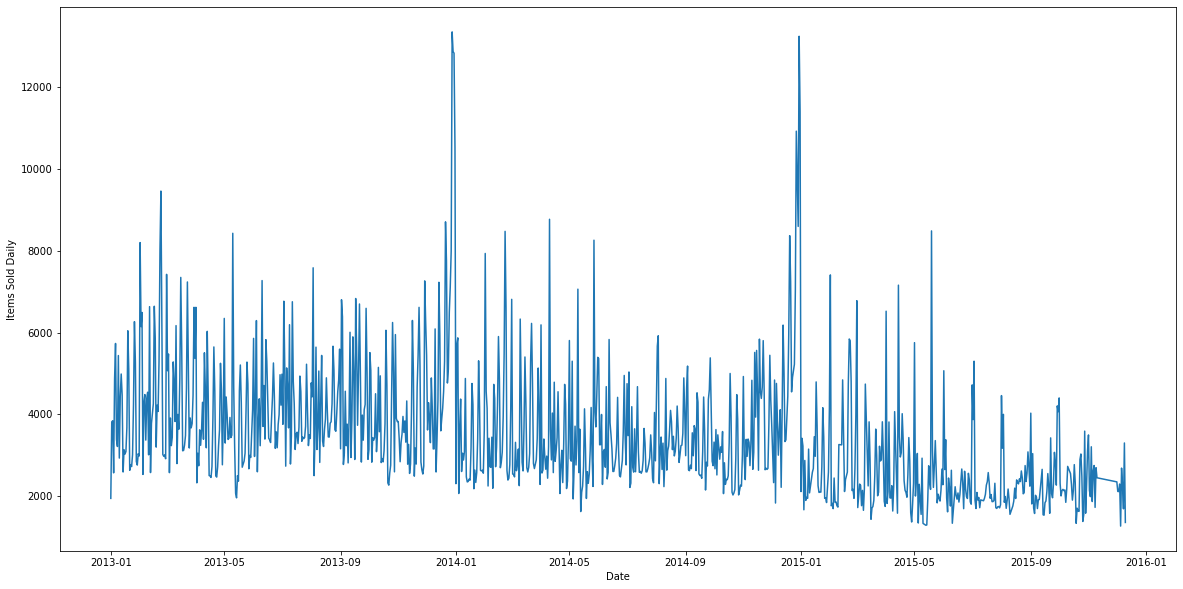

In [21]:
#Plot the timeseries

plt.figure(figsize = (20,10))
fig = plt.figure(1)
plt.plot(df_sales_train_daily)
plt.xlabel("Date")
plt.ylabel("Items Sold Daily")

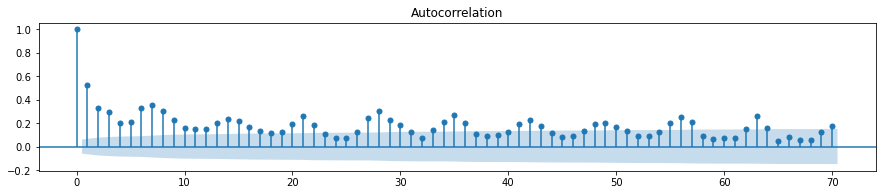

In [34]:
#Check ACF plot

fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_sales_train_daily.dropna(),lags = 70, ax = ax1)

In [42]:
#Create a differencing in the data by subtracting the shifted data from original
df_sales_train_daily_diff = pd.DataFrame(df_sales_train_daily-df_sales_train_daily.shift())

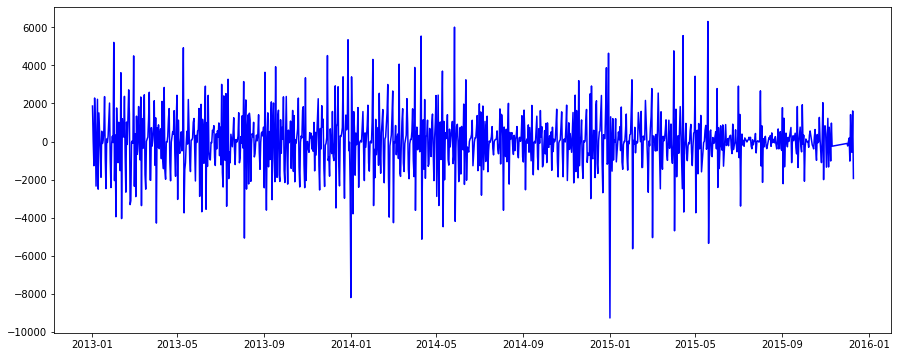

In [46]:
#plot the difference

plt.figure(figsize = (15,6))
plt.plot(df_sales_train_daily_diff, color = 'blue', label='Original')

In [47]:
#Seasonal Decomposition

decomp = seasonal_decompose(df_sales_train_daily, period = 7, model = 'multiplicative')

In [48]:
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

<function matplotlib.pyplot.show(close=None, block=None)>

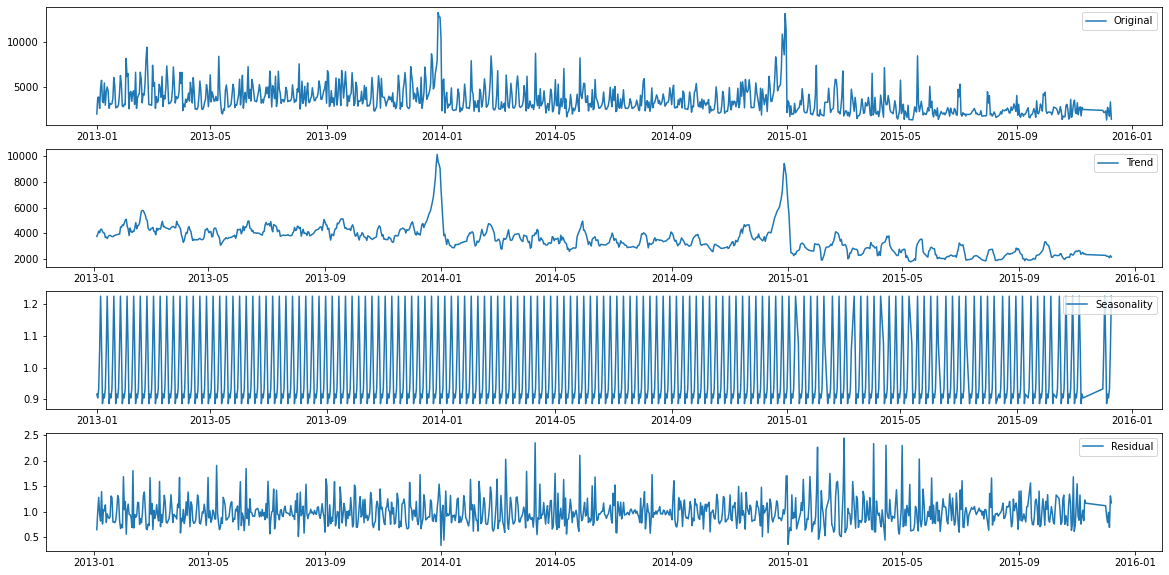

In [50]:
plt.figure(figsize = (20,10))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(df_sales_train_daily, label='Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc = 'best')

plt.show